# Housing

## Data

Get data using pandas. The function returns **pandas DataFrame** object that contains all the data

In [1]:
import csv
import os
import pandas as pd
import numpy as np
from webencodings import labels

# get data path
HOUSING_PATH = os.path.join('datasets', 'housing')

def extract_housing_data(housing_path: str =HOUSING_PATH) -> pd.DataFrame:
    # join base path with exact filename
    csv_housing_path = os.path.join(housing_path, 'housing.csv')

    # return pandas DataFrame
    return pd.read_csv(csv_housing_path)

See top five data rows

In [2]:
csv_data = extract_housing_data()
csv_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


See base data info via pandas DataFrame `info()`
As we can see below, dataset contains 20640 entries.

But, we're missing 207 of `total_bedrooms` features. We need to care about that soon.

In [3]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


See amount of `ocean_proximity` values.

In [4]:
csv_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

As you can see, the `ocean_proximity` feature type is **object**. This type can contain any of python objects, often - strings.

In our dataset, the feature can acquire to 5 string states.

`describe()` method shows summary of all **numeric** attributes

In [5]:
csv_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


All null values are ignored.

- *std* row shows *standard deviation*, which measures how values are dispersed.
- *25% 50% 75%* are *percentiles*. For example, if 50th percentile is 75 on some feature, it means that all sorted observation by this feature have a value lower than 75. Often 25th and 75th percentiles called as *first quartile* and *third quartile*

Here is how you can build histogram to every **DataFrame** features:

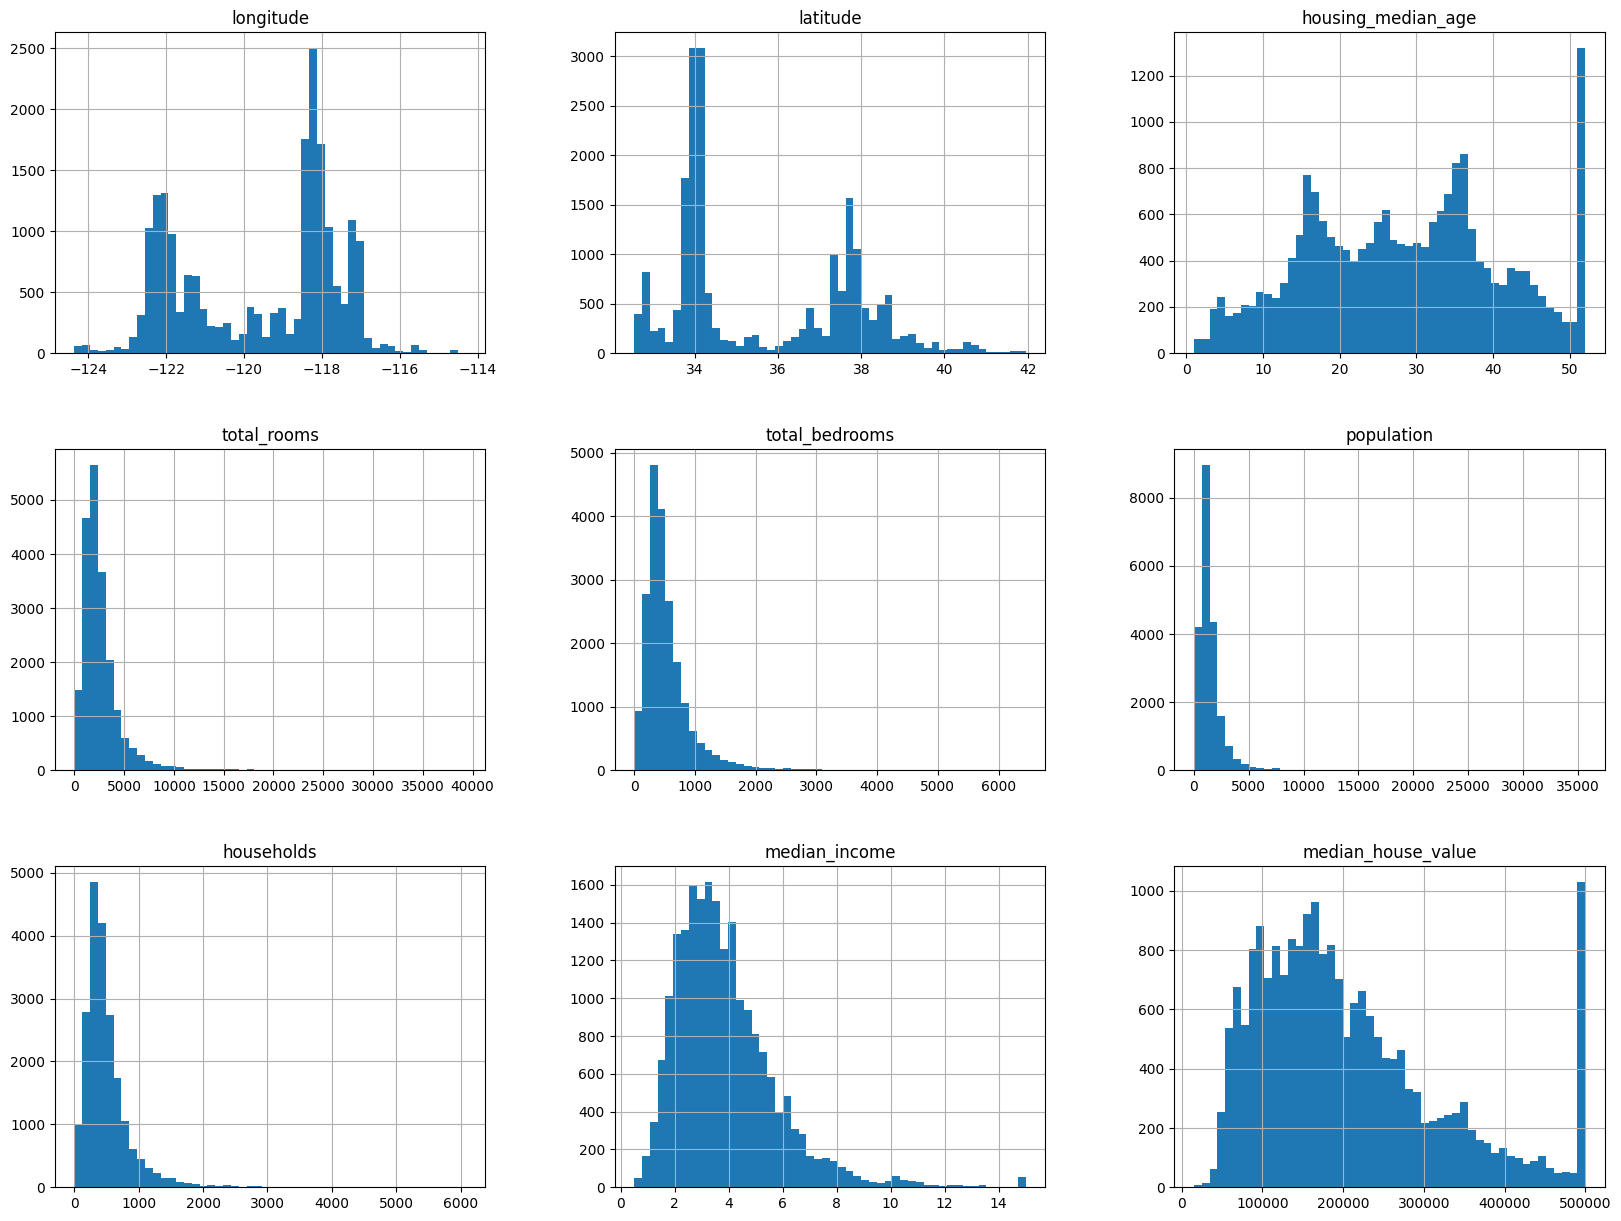

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

csv_data.hist(bins=50, figsize=(20, 15))
plt.show()

- `%matplotlib inline` Is a notebook magic command. That tells Jupyter to draw all histograms in notebook directly.

- `hist()` method draws all features histograms, `bins` argument divides output by number of columns.

The **Median Income** feature does not look like a standard income in US dollars. Because **each number** represents **tens of thousands** of dollars.

Median House value is our *labels* *(cause in our case we use supervised learning)*, and it's features is capped at 500_000 mark. ML algorithm may learn that prices **never** go beyond that limit.

To resolve this, we have two options:
- Collect proper data from regions, where data was capped
- Remove these regions from the dataset

## Create Test

Separating test data from training is a bit complicated. Often, it isn't good approach - just randomly pick 20% of all entries, especially, on small datasets.
Because it leads to train data won't be representative and static _(data always different with random picking approach)_ to train data.

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(csv_data, test_size=0.2, random_state=42) # Not good for smaller datasets

So, we can choose most important **labels** and stratify them. It means to separate data to categories, like on hist below.

<Axes: >

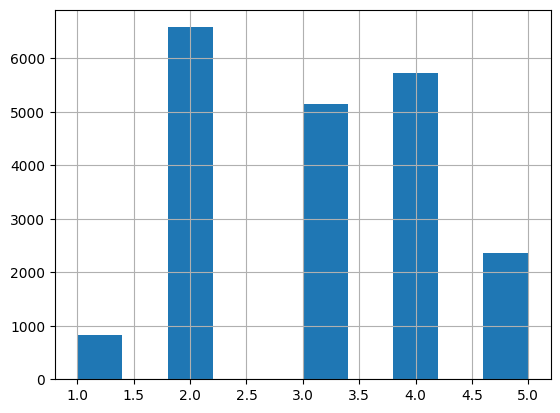

In [26]:
csv_data["income_category"] = pd.cut(csv_data["median_income"], bins=[0, 1.5, 3.0, 4.0, 6., np.inf], labels=[1, 2, 3, 4, 5])
csv_data["income_category"].hist()

Using `pandas.cut()` we're creating stratified income feature from `income_category`.

> `income_category` represents tens of thousands as one integer!

Line `bins=[0, 1.5, 3.0, 4.0, 6., np.inf` creates categories separation. For example: values 0.7 and 4.5 will be in first and fourth categories. `np.inf` represents infinity

Alright, now we can separate our train and test data.
Scikit-learn provides class `StratifiedShuffleSplit`, that can randomly but with almost identical income proportions.

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in splitter.split(X=csv_data, y=csv_data["income_category"]):
    strat_train_set = csv_data.loc[train_index]
    strat_test_set = csv_data.loc[test_index]

Let's look closer at this code.

Firstly we're creating `StratifiedShuffleSplit`, and passing amount of splits, size of test set and random state, to ensure that test set will always be static.

Then we're getting indexes, and getting them from original `DataFrame` object. Using `loc[index]` that looks to the left column that represents indexes. Note that `train_index` and `test_index` are lists

Now, we can check that data separated correctly. Using created `income_category` feature, dividing number of entries of each category with length of full dataset.

In [23]:

print(f"Test set: \n {strat_test_set['income_category'].value_counts() / len(strat_test_set)} \n")
print(f" Test set: \n {strat_train_set['income_category'].value_counts() / len(strat_train_set)}")

Test set: 
 income_category
2    0.318798
4    0.277374
3    0.249516
5    0.114341
1    0.039971
Name: count, dtype: float64 

 Test set: 
 income_category
2    0.318859
4    0.277374
3    0.249516
5    0.114462
1    0.039789
Name: count, dtype: float64


As we can see, stratified categories proportions are almost equal. It means that data **representable in both directions**.

